## **Fashion Clothes Classification with Artificial Neural Network**

For this project, I was to implement and train a feed-forward neural network also known as an "MLP" ("multi-layer perceptron") on a dataset called **"Fashion MNIST"**, which consist of small greyscale images of items of fashion.

A project like this is important to automatically tag clothes or other items in **e-commerce platforms** (e.g., Amazon, ASOS) based on style or category.
Other use cases include, in **Smartphones** (face recognition), **Healthcare** (identifying diseases in medical scans), **Manufacturing**	(detecting defective items on a production line via camera inspection), **Transportation** (self-driving cars recognizing pedestrians, traffic signs & road lanes), and **Security** (surveillance systems detecting unusual objects or people).

#### **Importing necessary libraries**

In [1]:
# Importing necessary libraries
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import keras
from keras.optimizers import RMSprop

In [2]:
# Loading and splitting the Fashion MNIST dataset
(train_val_images, train_val_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


---

- I loaded 60,000 images for training + validation, and 10,000 for testing.

- Each image is 28x28 pixels, showing one clothing item.

- Labels are numbered from 0 to 9, each representing a clothing category.

---

In [3]:
text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

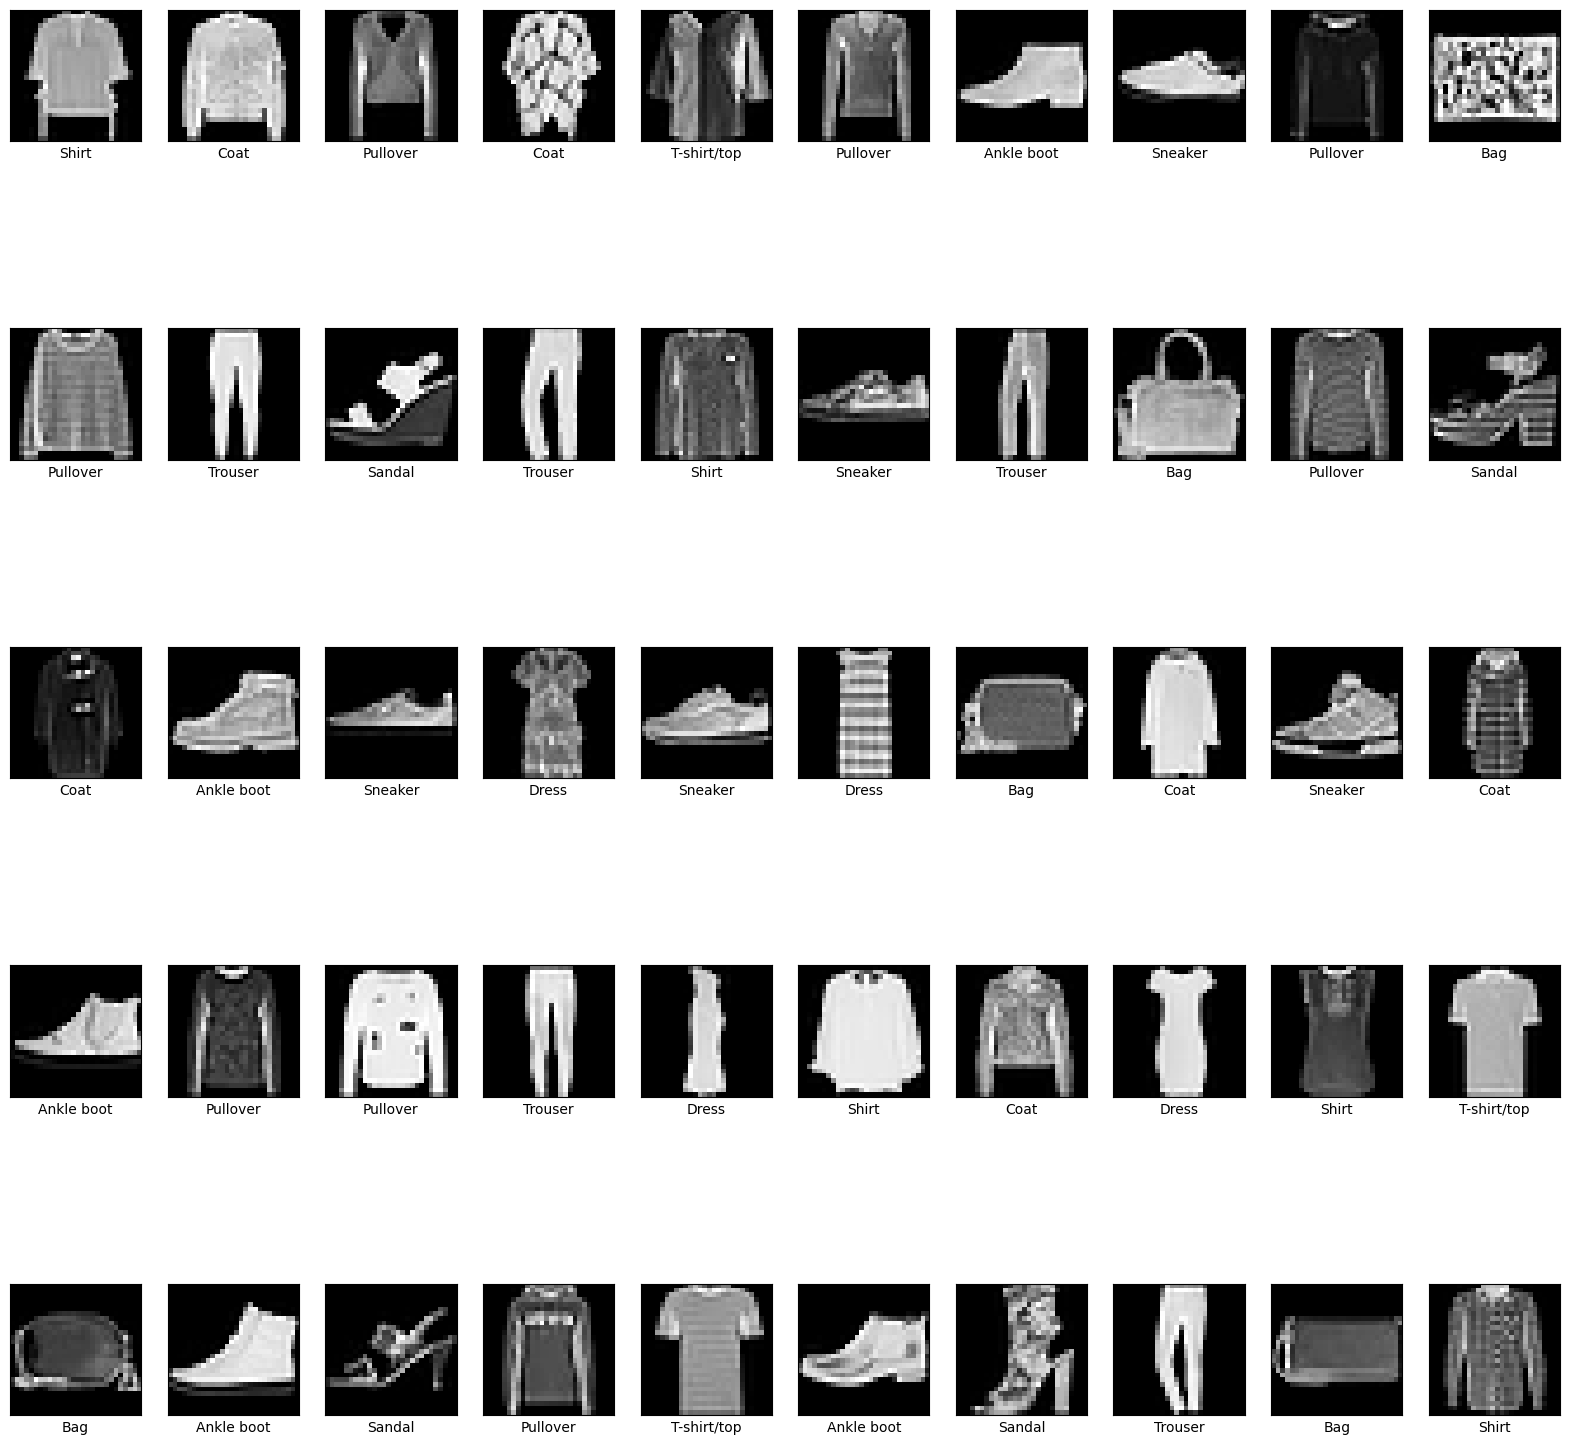

In [4]:
# Showing 50 randomly selected images from the dataset
plt.figure(figsize=(20,20))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')

    img_index = np.random.randint(0, 50000)
    plt.imshow(train_val_images[img_index], cmap=plt.cm.gray)
    plt.xlabel(text_labels[train_val_labels[img_index]])

#### **Preprocessing**

In [5]:
# Reshape and normalize the images
# Since I am using CNNs it expects input shape to be (height, width, channels)
train_images = train_val_images[:50000].reshape(-1, 28, 28, 1).astype("float32") / 255
validation_images = train_val_images[50000:].reshape(-1, 28, 28, 1).astype("float32") / 255
test_images = test_images.reshape(-1, 28, 28, 1).astype("float32") / 255

---

I divided my training data into:

- 50,000 for training

- 10,000 for validation

***.reshape(-1, 28, 28, 1)***: Reshapes the images to fit the input shape format CNN expects (height, width, channels).

***.astype("float32") / 255***: Changes pixel values from 0–255 to 0–1. This is to help my model learn faster.

---

In [6]:
# One-hot encode the categorical labels
train_labels_cat = to_categorical(train_val_labels[:50000], 10)
validation_labels_cat = to_categorical(train_val_labels[50000:], 10)
test_labels_cat = to_categorical(test_labels, 10)

#### **Building the Model**

In [7]:
# Building the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))  # Multi-class classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


---

- **The First Convulational Layer** is to detect basic patterns. This layer will use 32 filters to look at 3x3 sections of the image, then it downsamples/shrinks the image using max pooling. I included ***activation='relu'***, to help the model focus on the strongest signals.

- **The Second Convolutional Layer** is to detect more complex patterns.
This layer will use 64 filters to find more detailed patterns, then it reduces the size again using max pooling.

- I then turned the image into a flat list of numbers to prepare it for the final decision layers.

- Finally, I used a fully connected (**hidden**) layer with 128 neurons to learn features, and an **output layer** with 10 outputs, one for each clothing class.

I used **'dropout'** to prevent overfitting, and **'softmax'** to turn outputs into probabilities.

---

In [8]:
# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

- Using ***'adam'*** as an optimizer is a smart way for the model to adjust itself during learning.

- ***'categorical_crossentropy'*** is the best loss function for multi-class classification.

- ***'accuracy'*** will measure how many predictions are correct.

In [9]:
# Training the model
history = model.fit(train_images, train_labels_cat,
                    epochs=15,
                    batch_size=128,
                    validation_data=(validation_images, validation_labels_cat),
                    verbose=2)

Epoch 1/15
391/391 - 48s - 122ms/step - accuracy: 0.7743 - loss: 0.6206 - val_accuracy: 0.8483 - val_loss: 0.4164
Epoch 2/15
391/391 - 78s - 198ms/step - accuracy: 0.8573 - loss: 0.3960 - val_accuracy: 0.8755 - val_loss: 0.3384
Epoch 3/15
391/391 - 51s - 130ms/step - accuracy: 0.8773 - loss: 0.3397 - val_accuracy: 0.8731 - val_loss: 0.3318
Epoch 4/15
391/391 - 80s - 205ms/step - accuracy: 0.8864 - loss: 0.3111 - val_accuracy: 0.8917 - val_loss: 0.2962
Epoch 5/15
391/391 - 59s - 150ms/step - accuracy: 0.8963 - loss: 0.2871 - val_accuracy: 0.8986 - val_loss: 0.2733
Epoch 6/15
391/391 - 46s - 117ms/step - accuracy: 0.9019 - loss: 0.2679 - val_accuracy: 0.9032 - val_loss: 0.2699
Epoch 7/15
391/391 - 44s - 113ms/step - accuracy: 0.9061 - loss: 0.2549 - val_accuracy: 0.9021 - val_loss: 0.2640
Epoch 8/15
391/391 - 77s - 196ms/step - accuracy: 0.9121 - loss: 0.2414 - val_accuracy: 0.9108 - val_loss: 0.2510
Epoch 9/15
391/391 - 40s - 102ms/step - accuracy: 0.9162 - loss: 0.2269 - val_accuracy: 

In [10]:
# Evaluating on test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels_cat, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9114


In [11]:
predicted_classes = model.predict(test_images)
predicted_labels = np.argmax(predicted_classes, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


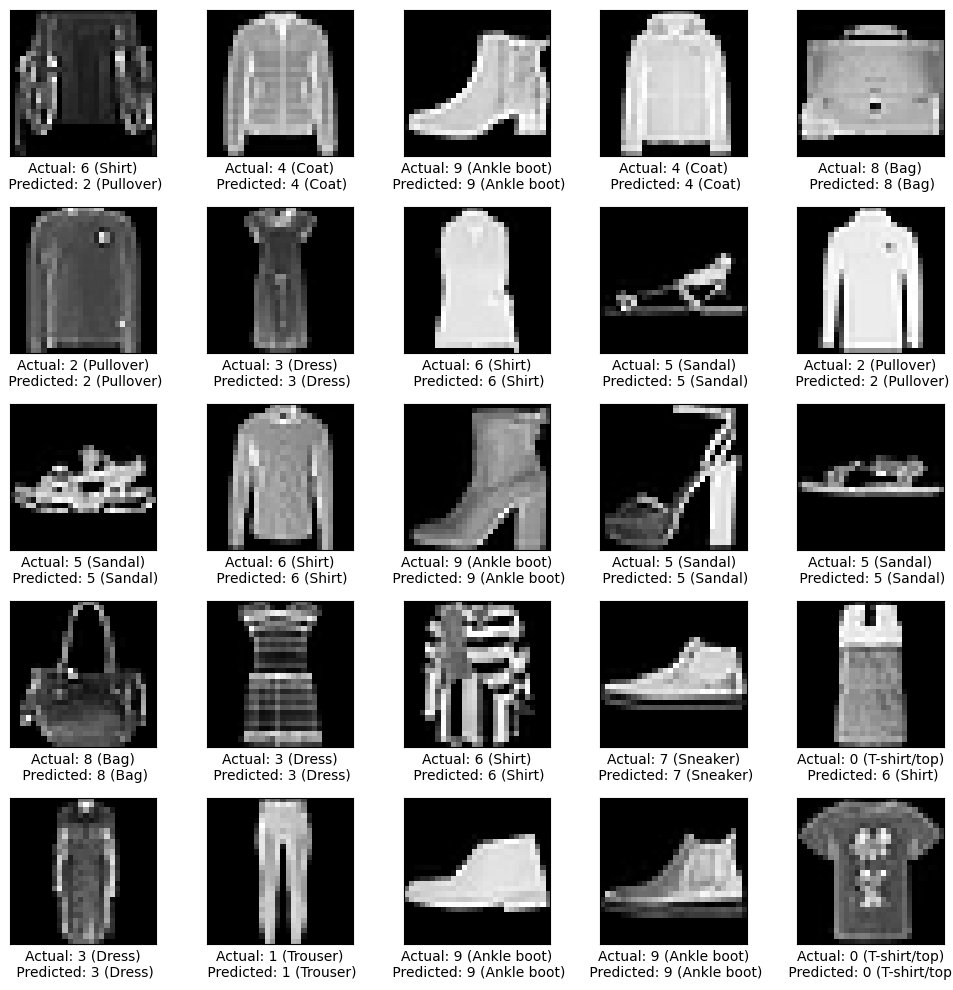

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')

    img_index = np.random.randint(0, 10000)
    plt.imshow(test_images[img_index], cmap=plt.cm.gray)

    actual_label = test_labels[img_index]
    predicted_label = predicted_labels[img_index]

    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


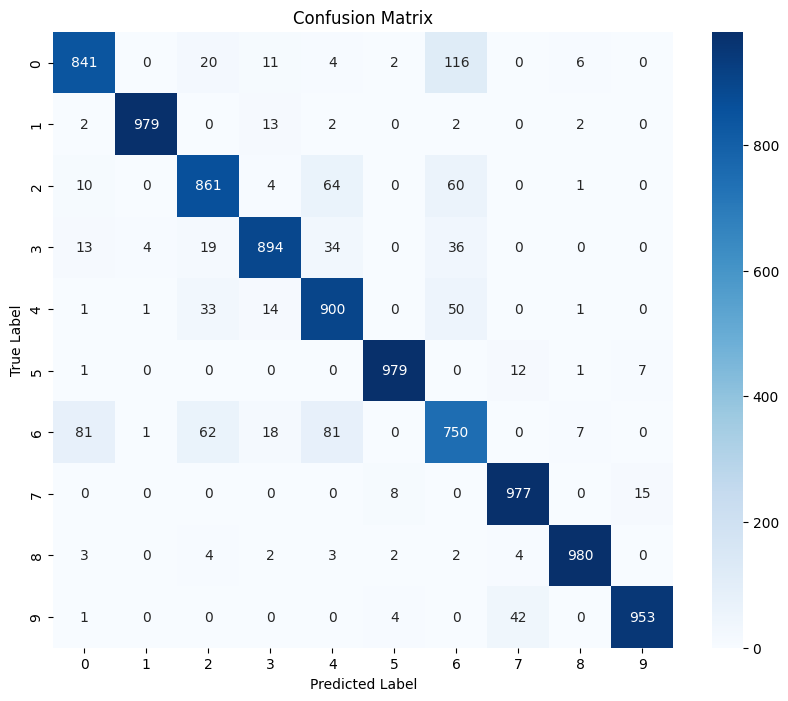

In [13]:
# 9. Confusion Matrix and Classification Report
predicted_classes = model.predict(test_images)
predicted_labels = np.argmax(predicted_classes, axis=1)

conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

---

The **Confusion Matrix** above, shows where the model made mistakes. For example, how many shirts were predicted as T-shirts, and so on for the other clothing types.

---

In [14]:
print("Classification Report:\n")
print(classification_report(test_labels, predicted_labels))

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.86      0.86      1000
           3       0.94      0.89      0.91      1000
           4       0.83      0.90      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.75      0.74      1000
           7       0.94      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



---


### **Interpretation of the CNN Model Classification Report**

---


- Accuracy: 91%

- Macro & Weighted F1-score: 0.91

This means my model is:

- Highly accurate across all 10 fashion classes.

- Balanced in performance, handling each class with relatively equal success.

---

**Class-by-Class Insights**

---

- **Class 0	(T-shirt/top)**	slightly underperformed on recall (0.83). It is probably being confused with shirts/pullovers.
- **Class 1	(Trouser)** excellent with very clear visual identity.
- **Class 2	(Pullover)** report shows that there is still some confusion (likely with coats or shirts).
- **Class 3	(Dress)**, well-balanced performance.
- **Class 4	(Coat)** shows good recognition, good precision and recall.
- **Class 5	(Sandal)**	an almost perfect report, very distinctive features.
- **Class 6	(Shirt)**	still the weakest, but significantly better than when I used dense network where F1-score was 0.68.
- **Class 7	(Sneaker)**	report shows great class separation.
- **Class 8	(Bag)**	reort is excellent. Its unique shape probably makes it easy to detect.
- **Class 9	(Ankle boot)** report shopws very reliable classification.

Overall, the model performed very well with a few weaknesses that are natural given the similarity between some clothing items.

---